# Linear regression [10 pts]

In this homework, you will implement solution algorithms for linear regression.


## Import libraries
Let's begin by importing some libraries. 

In [364]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

Automatically created module for IPython interactive environment


## Load dataset

Now, we are importing a dataset of diabetes. You can check the details on this dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset. 

The dataset consists of 442 observations with 10 attributes ($X$) that may affect the progression of diabetes ($y$). Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n$ = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [365]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print('The shape of the input features:',diabetes_X.shape)
print('The shape of the output varaible:',diabetes_y.shape)

The shape of the input features: (442, 10)
The shape of the output varaible: (442,)


We will choose just one attribute from the ten attributes as an input variable.

In [366]:
# Use only one feature
diabetes_X_one = diabetes_X[:, np.newaxis, 2]
print(diabetes_X_one.shape)

(442, 1)


## Dataset split

Now, we split the dataset into two parts: training set and test set. 

- training set: 422 samples
- test set: 20 samples 

In [367]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X_one[:-20]
diabetes_X_test = diabetes_X_one[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print('Training input variable shape:', diabetes_X_train.shape)
print('Test input variable shape:', diabetes_X_test.shape)

Training input variable shape: (422, 1)
Test input variable shape: (20, 1)


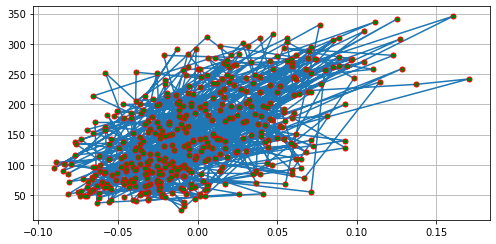

In [368]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.grid()
plt.plot(diabetes_X_one, diabetes_y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
plt.show()

## Linear regression 

Assume that we have a hypothesis $$ h_{\theta}(x) = \theta_0 + \theta_1 x. $$

Your tasks: 

- [4pts] implement your own version of the method of least-squares, compute and report $\theta_0$ and $\theta_1$ that minimize the residual sum of squares, 
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

- [4pts] implement your own version of the gradient descent algorithm, compute and report $\theta_0$ and $\theta_1$ that minimize the mean squared error $$ \sum_{i=1}^{N} \frac{1}{N}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

- [2pts] derive the analytical expression of the gradient if the loss is defined as 
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2 + \frac{\lambda}{2} \| \theta \|_2^2, $$
where $\theta = [\theta_0, \theta_1]^{\intercal}$

To check whether your computation is correct, consider using an API such as Scikit learn linearregression.

In [369]:
def compute_cost1(X, y, params):
  n_samples = len(y)
  X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
  y = y[:, np.newaxis]
  h = X @ params
  return (1/2)*np.sum((y-h)**2)

In [370]:
def compute_cost(X, y, theta):
  n_samples = len(y)
  X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
  y = y[:, np.newaxis]
  return (1/2*n_samples) * np.sum(np.square((X @ theta)-y))  

In [371]:
def gradient_descent(X, y, theta, alpha, n_iter):
  n_samples = len(y)
  X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
  y = y[:, np.newaxis]
  for i in range(n_iter):
    theta = theta - ((alpha/n_samples) *X.T @ (X @ theta - y)) 
  return theta

In [372]:
def gradient_descent_r(X, y, theta, alpha, n_iter,l):
  n_samples = len(y)
  X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
  y = y[:, np.newaxis]
  for i in range(n_iter):
    theta = theta - ((alpha/n_samples) *X.T @ (X @ theta - y)) - l*theta
  return theta

In [373]:
def predict(X,theta):
  n_samples = len(X)
  X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
  y_pred = X @ theta
  return y_pred

In [374]:
def score(X, y,theta):
  n_samples = np.size(X, 0)
  X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
  y = y[:, np.newaxis]
  y_pred = X @ theta
  score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())
  return score

In [389]:
n_iters = 3000
n_features = np.size(diabetes_X_train, 1)
learning_rate = 0.05
theta = np.zeros((n_features + 1, 1))
(optimal_params) = gradient_descent(diabetes_X_train,diabetes_y_train , theta, learning_rate, n_iters)
print("Optimal parameters are: \n", optimal_params, "\n")
y_pred= predict(diabetes_X_test,optimal_params)
s = (((diabetes_y_test - y_pred)**2).sum() / ((diabetes_y_test - diabetes_y_test.mean())**2).sum())
print(s)
accuracy= score(diabetes_X_test,diabetes_y_test, optimal_params)
print("Score: ", accuracy, "\n")

Optimal parameters are: 
 [[153.36255924]
 [ 44.64921599]] 

31.307251730115453
Score:  0.38707754503172365 



In [390]:
n_iters = 3000
n_features = np.size(diabetes_X_train, 1)
learning_rate = 0.05
l=0.005
theta = np.zeros((n_features + 1, 1))
(optimal_params) = gradient_descent_r(diabetes_X_train,diabetes_y_train , theta, learning_rate, n_iters,l)
print("Optimal parameters are: \n", optimal_params, "\n")
y_pred= predict(diabetes_X_test,optimal_params)
s = (((diabetes_y_test - y_pred)**2).sum() / ((diabetes_y_test - diabetes_y_test.mean())**2).sum())
print(s)
accuracy= score(diabetes_X_test,diabetes_y_test, optimal_params)
print("Score: ", accuracy, "\n")

Optimal parameters are: 
 [[139.4205084 ]
 [ 40.59019636]] 

27.544133842716846
Score:  0.48864797289824646 



In [391]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr

In [392]:
our_parameters = gradient_descent_r(diabetes_X_train,diabetes_y_train , theta, learning_rate, n_iters,l)
sklearn_regressor = lr().fit(diabetes_X_train, diabetes_y_train)
our_train_accuracy = score(diabetes_X_train,diabetes_y_train, optimal_params)
sklearn_train_accuracy = sklearn_regressor.score(diabetes_X_train, diabetes_y_train)
our_test_accuracy = score(diabetes_X_test,diabetes_y_test, optimal_params)
sklearn_test_accuracy = sklearn_regressor.score(diabetes_X_test, diabetes_y_test)

In [393]:
print("sklearn_train_accuracy: " ,sklearn_train_accuracy)
print("our_train_accuracy: ", our_train_accuracy)
print("sklearn_test_accuracy: ",sklearn_test_accuracy)
print("our_test_accuracy: " ,our_test_accuracy)

sklearn_train_accuracy:  0.3351312506867543
our_train_accuracy:  0.29968469142830156
sklearn_test_accuracy:  0.47257544798227147
our_test_accuracy:  0.48864797289824646
